In [7]:
import pandas as pd

# war.csv 파일을 읽어옵니다.
df = pd.read_csv('ukrineWar.csv')

# 'Tweet' 열의 문자열을 전처리합니다.
df['Tweet'] = df['Tweet'].str.replace(r'@\w+', '', regex=True)

# 전처리된 데이터를 확인합니다.
print(df['Tweet'])

df.to_csv('ukrineWar.csv', index=False) # 전처리 결과를 원본 파일에 저장합니다.
print("전처리 결과가 'ukrineWar.csv' 파일에 저장되었습니다.")
print(df['Tweet'])


0      Russia loses control of territory south of Bak...
1      Offenbar aufgrund hoher Verluste verschärft di...
2      BlackRock “gatekeeper” Serge Varlay says Ukrai...
3      Because unlike the two years of Covid and one ...
4      A #US -made M777 howitzer gets destroyed by #R...
                             ...                        
995     I must take issue with you on your statement....
996    This article should b: Why sane Americans call...
997    does anybody know whether it is possible to de...
998     The conservatives should understand that the ...
999    Ukraine missiles damage bridge to Crimea: Russ...
Name: Tweet, Length: 1000, dtype: object
전처리 결과가 'ukrineWar.csv' 파일에 저장되었습니다.
0      Russia loses control of territory south of Bak...
1      Offenbar aufgrund hoher Verluste verschärft di...
2      BlackRock “gatekeeper” Serge Varlay says Ukrai...
3      Because unlike the two years of Covid and one ...
4      A #US -made M777 howitzer gets destroyed by #R...
          

In [11]:
import re
df['Tweet'] = df['Tweet'].str.replace(r'[^\w\s.,!?"]', '', regex=True)
df.to_csv('war.csv', index=False)
print(df['Tweet'])



0      Russia loses control of territory south of Bak...
1      Offenbar aufgrund hoher Verluste verschärft di...
2      BlackRock gatekeeper Serge Varlay says Ukraine...
3      Because unlike the two years of Covid and one ...
4      A US made M777 howitzer gets destroyed by Russ...
                             ...                        
995     I must take issue with you on your statement....
996    This article should b Why sane Americans call ...
997    does anybody know whether it is possible to de...
998     The conservatives should understand that the ...
999    Ukraine missiles damage bridge to Crimea Russi...
Name: Tweet, Length: 1000, dtype: object


In [14]:
df_tweet = df['Tweet']
df_tweet

0      Russia loses control of territory south of Bak...
1      Offenbar aufgrund hoher Verluste verschärft di...
2      BlackRock gatekeeper Serge Varlay says Ukraine...
3      Because unlike the two years of Covid and one ...
4      A US made M777 howitzer gets destroyed by Russ...
                             ...                        
995     I must take issue with you on your statement....
996    This article should b Why sane Americans call ...
997    does anybody know whether it is possible to de...
998     The conservatives should understand that the ...
999    Ukraine missiles damage bridge to Crimea Russi...
Name: Tweet, Length: 1000, dtype: object

In [16]:
df_tweet.head()

0    Russia loses control of territory south of Bak...
1    Offenbar aufgrund hoher Verluste verschärft di...
2    BlackRock gatekeeper Serge Varlay says Ukraine...
3    Because unlike the two years of Covid and one ...
4    A US made M777 howitzer gets destroyed by Russ...
Name: Tweet, dtype: object

In [17]:
import pandas as pd

df = pd.read_csv('war.csv')
df_subset = df[['Date', 'Tweet']]
df_subset.to_csv('war_subset.csv', index=False)


In [18]:
# 여기서부터 일시와 내용만 분리된 자료 재처리 시작

In [20]:
!pip install konlpy 
!pip install nltk 
!pip install textblob
!pip install gensim 

In [21]:
import re


In [70]:
df_dt_tw = pd.read_excel('ukrineWarSubset.xlsx')


In [71]:
df_dt_tw.tail()

,Date,Tweet
995,2023-06-22 13:29:34+00:00,I must take issue with you on your statement....
996,2023-06-22 13:28:38+00:00,This article should b Why sane Americans call ...
997,2023-06-22 13:28:08+00:00,does anybody know whether it is possible to de...
998,2023-06-22 13:27:46+00:00,The conservatives should understand that the ...
999,2023-06-22 13:27:44+00:00,Ukraine missiles damage bridge to Crimea Russi...


In [72]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: re.sub(r'[^\w\s\d]|\n',' ', x))

In [73]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: re.sub(r'[가-힣ㄱ-ㅎ]',' ', x))

In [74]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: re.sub(r'[^\w\s\d]',' ', x))

In [75]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: x.split('httpst')[0])

In [76]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: re.sub('[\u4e00-\u9fff]+', '', x))


In [77]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: re.sub(r'[^A-Za-z\s\d]|\n',' ', x))
df_dt_tw['Tweet']

0      Russia loses control of territory south of Bak...
1      Offenbar aufgrund hoher Verluste versch rft di...
2      BlackRock gatekeeper Serge Varlay says Ukraine...
3      Because unlike the two years of Covid and one ...
4      A US made M777 howitzer gets destroyed by Russ...
                             ...                        
995     I must take issue with you on your statement ...
996    This article should b Why sane Americans call ...
997    does anybody know whether it is possible to de...
998     The conservatives should understand that the ...
999    Ukraine missiles damage bridge to Crimea Russi...
Name: Tweet, Length: 1000, dtype: object

In [78]:
df_dt_tw.to_excel('removebreakletter.xlsx', index=False)

In [79]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: x.lower())
df_dt_tw['Tweet']

0      russia loses control of territory south of bak...
1      offenbar aufgrund hoher verluste versch rft di...
2      blackrock gatekeeper serge varlay says ukraine...
3      because unlike the two years of covid and one ...
4      a us made m777 howitzer gets destroyed by russ...
                             ...                        
995     i must take issue with you on your statement ...
996    this article should b why sane americans call ...
997    does anybody know whether it is possible to de...
998     the conservatives should understand that the ...
999    ukraine missiles damage bridge to crimea russi...
Name: Tweet, Length: 1000, dtype: object

In [82]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [83]:
from nltk.corpus import stopwords #stopword 확인
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [84]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
df_dt_tw['Tweet']

0      russia loses control territory south bakhmut u...
1      offenbar aufgrund hoher verluste versch rft di...
2      blackrock gatekeeper serge varlay says ukraine...
3      unlike two years covid one ukraine war story r...
4      us made m777 howitzer gets destroyed russia n ...
                             ...                        
995    must take issue statement naiste irelands fore...
996    article b sane americans call ukraine war game...
997    anybody know whether possible detect jam lance...
998    conservatives understand plan pumping billions...
999    ukraine missiles damage bridge crimea russian ...
Name: Tweet, Length: 1000, dtype: object

In [85]:
df_dt_tw.to_excel('removebreakletter2.xlsx', index=False)

In [86]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: re.sub(r'[\d]','', x))
df_dt_tw['Tweet']

0      russia loses control territory south bakhmut u...
1      offenbar aufgrund hoher verluste versch rft di...
2      blackrock gatekeeper serge varlay says ukraine...
3      unlike two years covid one ukraine war story r...
4      us made m howitzer gets destroyed russia n art...
                             ...                        
995    must take issue statement naiste irelands fore...
996    article b sane americans call ukraine war game...
997    anybody know whether possible detect jam lance...
998    conservatives understand plan pumping billions...
999    ukraine missiles damage bridge crimea russian ...
Name: Tweet, Length: 1000, dtype: object

In [87]:
df_dt_tw.to_excel('removebreakletter2.xlsx', index=False)

In [88]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1 or word == ' ']))
df_dt_tw['Tweet']

0      russia loses control territory south bakhmut u...
1      offenbar aufgrund hoher verluste versch rft di...
2      blackrock gatekeeper serge varlay says ukraine...
3      unlike two years covid one ukraine war story r...
4      us made howitzer gets destroyed russia artille...
                             ...                        
995    must take issue statement naiste irelands fore...
996    article sane americans call ukraine war gamech...
997    anybody know whether possible detect jam lance...
998    conservatives understand plan pumping billions...
999    ukraine missiles damage bridge crimea russian ...
Name: Tweet, Length: 1000, dtype: object

In [89]:
df_dt_tw.to_excel('removebreakletter2.xlsx', index=False)

In [92]:
from nltk.stem import PorterStemmer #Stemming
st = PorterStemmer()

In [93]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [94]:
df_dt_tw['Tweet']

0      russia lose control territori south bakhmut uk...
1      offenbar aufgrund hoher verlust versch rft die...
2      blackrock gatekeep serg varlay say ukrain war ...
3      unlik two year covid one ukrain war stori real...
4      us made howitz get destroy russia artilleri uk...
                             ...                        
995    must take issu statement naist ireland foreign...
996       articl sane american call ukrain war gamechang
997    anybodi know whether possibl detect jam lancet...
998    conserv understand plan pump billion british p...
999    ukrain missil damag bridg crimea russian offic...
Name: Tweet, Length: 1000, dtype: object

In [95]:
df_dt_tw['Tweet'] = df_dt_tw['Tweet'].apply(lambda x: x.split())
df_dt_tw['Tweet']

0      [russia, lose, control, territori, south, bakh...
1      [offenbar, aufgrund, hoher, verlust, versch, r...
2      [blackrock, gatekeep, serg, varlay, say, ukrai...
3      [unlik, two, year, covid, one, ukrain, war, st...
4      [us, made, howitz, get, destroy, russia, artil...
                             ...                        
995    [must, take, issu, statement, naist, ireland, ...
996    [articl, sane, american, call, ukrain, war, ga...
997    [anybodi, know, whether, possibl, detect, jam,...
998    [conserv, understand, plan, pump, billion, bri...
999    [ukrain, missil, damag, bridg, crimea, russian...
Name: Tweet, Length: 1000, dtype: object

In [96]:
df_dt_tw.to_excel('removebreakletter2.xlsx', index=False)

In [97]:
!pip install gensim

In [98]:
from gensim import corpora, models

# 토큰화된 데이터를 리스트 형태로 변환
tokenized_data = df_dt_tw['Tweet'].tolist()

# 단어 사전 생성
dictionary = corpora.Dictionary(tokenized_data)

# 문서-단어 행렬 생성
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

# LDA 모델 생성
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# 주제별 단어 출력
for idx, topic in lda_model.print_topics(-1):
    print(f"주제 {idx}: {topic}")

# 문서의 주제 할당
doc_topics = [lda_model.get_document_topics(doc) for doc in corpus]


주제 0: 0.034*"war" + 0.027*"ukrain" + 0.010*"amp" + 0.008*"russian" + 0.005*"gt" + 0.004*"day" + 0.004*"get" + 0.003*"russiaukrain" + 0.003*"support" + 0.003*"nation"
주제 1: 0.024*"war" + 0.022*"ukrain" + 0.012*"children" + 0.010*"use" + 0.010*"live" + 0.010*"say" + 0.009*"shield" + 0.009*"report" + 0.009*"human" + 0.009*"un"
주제 2: 0.028*"ukrain" + 0.016*"war" + 0.014*"ukrainewar" + 0.010*"de" + 0.005*"dog" + 0.005*"russia" + 0.005*"lo" + 0.004*"militari" + 0.004*"der" + 0.004*"biden"
주제 3: 0.021*"de" + 0.016*"ukrainewar" + 0.014*"ukrain" + 0.011*"en" + 0.008*"un" + 0.008*"war" + 0.005*"us" + 0.004*"est" + 0.004*"russia" + 0.004*"russiaukrain"
주제 4: 0.046*"war" + 0.028*"ukrain" + 0.010*"end" + 0.010*"russiaukrain" + 0.008*"da" + 0.007*"kennedi" + 0.006*"robert" + 0.006*"de" + 0.006*"world" + 0.005*"countri"
주제 5: 0.065*"ukrain" + 0.056*"war" + 0.021*"russia" + 0.011*"ukrainewar" + 0.007*"support" + 0.007*"us" + 0.007*"death" + 0.007*"nuclear" + 0.006*"good" + 0.006*"peopl"
주제 6: 0.054*"u

In [99]:
!pip install Matplotlib
!pip install WordCloud

     ------------------------------------ 152.1/152.1 kB 216.2 kB/s eta 0:00:00


C:\Users\josephcyh\AppData\Local\Temp\ipykernel_22408\1016374915.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_topics)


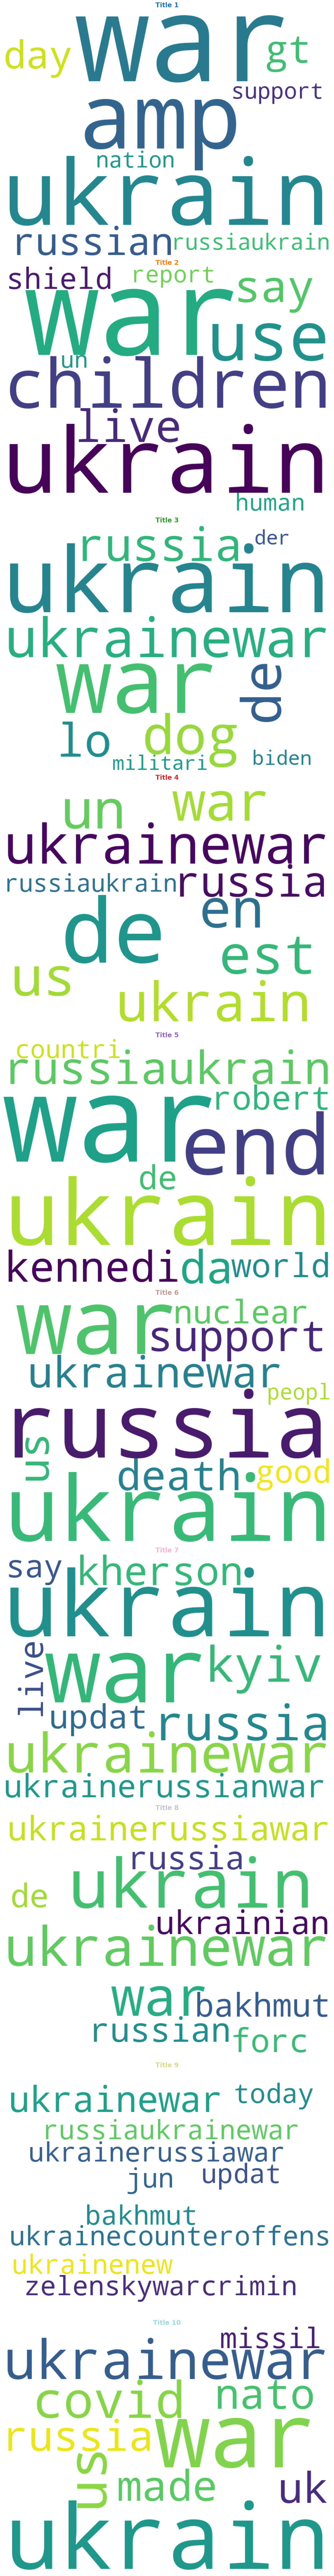

In [107]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 주제별 상위 단어 추출
top_words_per_topic = []
for idx, topic in lda_model.print_topics(-1):
    words = topic.split('"')[1::2]
    top_words_per_topic.append(words)

# WordCloud 생성 및 시각화
num_topics = lda_model.num_topics
fig, axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(100, 120), sharex=True, dpi=80)
colors = plt.cm.get_cmap('tab20', num_topics)

for i, ax in enumerate(axes.flatten()):
    topic_words = top_words_per_topic[i]
    wordcloud = WordCloud(background_color='white', width=800, height=600).generate(' '.join(topic_words))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Title {i+1}', fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': colors(i)})
    ax.axis('off')

plt.tight_layout()
plt.show()
